## Table 4 (Journal of Climate submission; Molina et al.)

Table 4. Mean thermocline depth in meters, represented as the depth of the 20◦C isotherm (Kessler 1990),across the Niño 3.4 region during El Niño, La Niña, and mean climatology. ENSO events and climatologyare derived from the years 800-1599 for the CESM1 control, 201-500 for Global and Pacific experiments, and101-250 for the Pacific Salt experiment.

**Table by: Maria J. Molina**

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cftime

In [2]:
from config import directory_figs, directory_data

In [3]:
def pop_lon_indx():
    """
    Extract mask for the pacific slab region. Mask contains ones and nans.
    """
    for_lon = xr.open_dataset('/glade/scratch/molina/amoc_exp/b.e11.B1850LENS.f09_g16.FWAtSalG02Sv.pop.h.SST.000101-005012.nc')
    mask = for_lon['SST'].where((for_lon['TLAT']<5) & (for_lon['TLAT']>-5) & (for_lon['TLONG']>-170+360) & (for_lon['TLONG']<-120+360), 
                                 drop=False).isel(z_t=0, time=0).values
    return np.where(np.isnan(mask), np.nan, 1)

def compute_iso(threedim_array, mask):
    """
    Create array of depth of isotherm using 3d iso array and 2d mask.
    Args:
        threedim_array (numpy array): Isotherm values.
        mask (numpy array): Mask from pop_lon_indx.
    Returns:
        One dimensional array across Pacific slab region.
    """
    newmask = np.nanmean(np.nanmean(threedim_array[:,:,:] * mask[np.newaxis,:,:], axis=0), axis=0) * 0.01
    return newmask[~np.isnan(newmask)]

def for_time_series(threedim_array, mask):
    """
    Create array of depth of isotherm using 3d iso array and 2d mask.
    Args:
        threedim_array (numpy array): Isotherm values.
        mask (numpy array): Mask from pop_lon_indx.
    Returns:
        One dimensional array across Pacific slab region.
    """
    newmask = np.nanmean(threedim_array[:,:,:] * mask[np.newaxis,:,:], axis=1) * 0.01
    return newmask[~np.isnan(newmask)]

In [4]:
# grab lon indxs
lon_array_locs = pop_lon_indx()

In [5]:
# slab isotherms
iso20_g02sv = xr.open_dataset(
    f'{directory_data}iso20c_FWAtSalG02Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(500, 12, 1, 0, 0)))['DEPTH_OF_20C'].resample(TIME='QS-DEC').mean(skipna=True)

iso20_g04sv = xr.open_dataset(
    f'{directory_data}iso20c_FWAtSalG04Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(500, 12, 1, 0, 0)))['DEPTH_OF_20C'].resample(TIME='QS-DEC').mean(skipna=True)

iso20_p02sv = xr.open_dataset(
    f'{directory_data}iso20c_FWAtSalP02Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(500, 12, 1, 0, 0)))['DEPTH_OF_20C'].resample(TIME='QS-DEC').mean(skipna=True)

iso20_p04sv = xr.open_dataset(
    f'{directory_data}iso20c_FWAtSalP04Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(500, 12, 1, 0, 0)))['DEPTH_OF_20C'].resample(TIME='QS-DEC').mean(skipna=True)

iso20_psalt = xr.open_dataset(
    f'{directory_data}iso20c_FWPaSalP04Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(101, 1, 1, 0, 0),cftime.DatetimeNoLeap(250, 12, 1, 0, 0)))['DEPTH_OF_20C'].resample(TIME='QS-DEC').mean(skipna=True)

iso20_cntrl = xr.open_dataset(
    f'{directory_data}iso20c_005.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(800, 1, 1, 0, 0),cftime.DatetimeNoLeap(1599, 12, 1, 0, 0)))['DEPTH_OF_20C'].resample(TIME='QS-DEC').mean(skipna=True)


In [6]:
iso20_g02sv = iso20_g02sv[iso20_g02sv['TIME.month']==12].values
iso20_g04sv = iso20_g04sv[iso20_g04sv['TIME.month']==12].values
iso20_p02sv = iso20_p02sv[iso20_p02sv['TIME.month']==12].values
iso20_p04sv = iso20_p04sv[iso20_p04sv['TIME.month']==12].values
iso20_psalt = iso20_psalt[iso20_psalt['TIME.month']==12].values
iso20_cntrl = iso20_cntrl[iso20_cntrl['TIME.month']==12].values

/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice


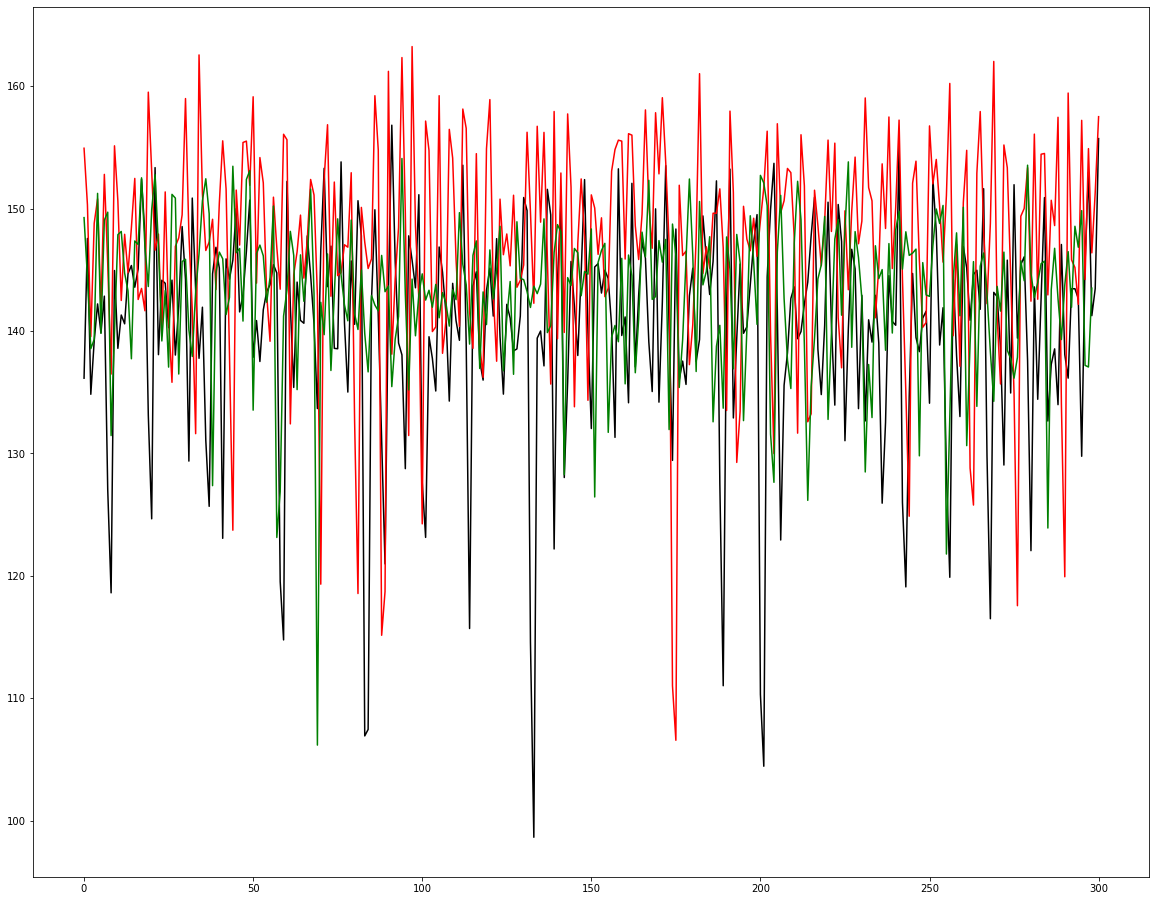

In [7]:
# just checking time series of nino-3.4 thermoclines (20C)
fig = plt.figure(figsize=(20,16))
plt.plot(np.nanmean(for_time_series(iso20_g02sv, lon_array_locs).reshape(iso20_g02sv.shape[0],45),axis=1),c='k');
plt.plot(np.nanmean(for_time_series(iso20_g04sv, lon_array_locs).reshape(iso20_g04sv.shape[0],45),axis=1),c='r');
#plt.plot(np.nanmean(for_time_series(iso20_p02sv, lon_array_locs).reshape(iso20_p02sv.shape[0],45),axis=1),c='salmon');
#plt.plot(np.nanmean(for_time_series(iso20_p04sv, lon_array_locs).reshape(iso20_p04sv.shape[0],45),axis=1),c='r');
#plt.plot(np.nanmean(for_time_series(iso20_psalt, lon_array_locs).reshape(iso20_psalt.shape[0],45),axis=1));
plt.plot(np.nanmean(for_time_series(iso20_cntrl, lon_array_locs).reshape(iso20_cntrl.shape[0],45),axis=1)[401:700],c='g');
plt.show()

In [8]:
iso20_g02sv = compute_iso(iso20_g02sv, lon_array_locs)
iso20_g04sv = compute_iso(iso20_g04sv, lon_array_locs)
iso20_p02sv = compute_iso(iso20_p02sv, lon_array_locs)
iso20_p04sv = compute_iso(iso20_p04sv, lon_array_locs)
iso20_psalt = compute_iso(iso20_psalt, lon_array_locs)
iso20_cntrl = compute_iso(iso20_cntrl, lon_array_locs)

/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice


In [9]:
nino_iso20 = xr.open_dataset(f'{directory_data}ninoslabs_DEPTH_OF_20C.nc')
nina_iso20 = xr.open_dataset(f'{directory_data}ninaslabs_DEPTH_OF_20C.nc')

In [10]:
print(np.around(iso20_cntrl.mean(),1))
print(np.around(iso20_g02sv.mean(),1))
print(np.around(iso20_g04sv.mean(),1))
print(np.around(iso20_p02sv.mean(),1))
print(np.around(iso20_p04sv.mean(),1))
print(np.around(iso20_psalt.mean(),1))

143.3
140.2
147.0
142.3
143.3
143.2


In [11]:
print(np.around(nino_iso20['cntrl_nino'].mean().values,1))
print(np.around(nino_iso20['g02sv_nino'].mean().values,1))
print(np.around(nino_iso20['g04sv_nino'].mean().values,1))
print(np.around(nino_iso20['p02sv_nino'].mean().values,1))
print(np.around(nino_iso20['p04sv_nino'].mean().values,1))
print(np.around(nino_iso20['psalt_nino'].mean().values,1))

147.0
139.5
144.7
144.7
144.0
146.5


In [12]:
print(np.around(nina_iso20['cntrl_nina'].mean().values,1))
print(np.around(nina_iso20['g02sv_nina'].mean().values,1))
print(np.around(nina_iso20['g04sv_nina'].mean().values,1))
print(np.around(nina_iso20['p02sv_nina'].mean().values,1))
print(np.around(nina_iso20['p04sv_nina'].mean().values,1))
print(np.around(nina_iso20['psalt_nina'].mean().values,1))

141.8
140.9
149.1
139.7
142.4
142.0
